<h4>
    1.Setup

In [1]:
#From TF Tutorial.
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
print(tf.__version__)  # check the TF version!

2.5.0


In [2]:
#From TF Tutorial.
df = pd.read_csv('./Metro_Interstate_reduced.csv')
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
40570,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
40571,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
40572,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
40573,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [3]:
#MP
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              40575 non-null  object 
 1   temp                 40575 non-null  float64
 2   rain_1h              40575 non-null  float64
 3   snow_1h              40575 non-null  float64
 4   clouds_all           40575 non-null  int64  
 5   weather_main         40575 non-null  object 
 6   weather_description  40575 non-null  object 
 7   date_time            40575 non-null  object 
 8   traffic_volume       40575 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.8+ MB


In [4]:
#From TF Tutorial.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,40575.0,281.316763,13.816618,0.0,271.84,282.86,292.28,310.07
rain_1h,40575.0,0.318632,48.812640,0.0,0.00,0.00,0.00,9831.30
snow_1h,40575.0,0.000117,0.005676,0.0,0.00,0.00,0.00,0.51
clouds_all,40575.0,44.199162,38.683447,0.0,1.00,40.00,90.00,100.00
traffic_volume,40575.0,3290.650474,1984.772909,0.0,1248.50,3427.00,4952.00,7280.00


In [5]:
#MP
#print unique values for "holiday"feature and get count
print(df.holiday.unique())
print(len(df.holiday.unique()))

['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']
12


In [6]:
#MP
#print unique values for "weather_main"feature and get count
print(df.weather_main.unique())
print(len(df.weather_main.unique()))

['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Fog' 'Thunderstorm' 'Haze'
 'Snow' 'Squall' 'Smoke']
11


In [7]:
#MP
#print unique values for "weather_description"feature and get count
print(df.weather_description.unique())
print(len(df.weather_description.unique()))

['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'fog'
 'proximity shower rain' 'moderate rain' 'drizzle' 'heavy intensity rain'
 'proximity thunderstorm' 'haze' 'heavy snow'
 'thunderstorm with light rain' 'snow' 'light rain and snow'
 'light intensity shower rain' 'SQUALLS'
 'proximity thunderstorm with rain' 'thunderstorm with rain'
 'thunderstorm with heavy rain' 'heavy intensity drizzle' 'Sky is Clear'
 'very heavy rain' 'thunderstorm with light drizzle' 'thunderstorm'
 'light snow' 'smoke' 'freezing rain' 'light shower snow' 'sleet'
 'proximity thunderstorm with drizzle']
35


In [8]:
#MP
#Three feature engineering tasks to apply for above data to make it work for Keras
#1. Convert holiday to numerical feature by encoding it as Holiday = None and Holday = Yes
#2. Converting the weather_main feature by encoding it.
#3. Convert date time to sin-cosin, similarly to TF Tutorial
#4. Drop "weather_description", as weather_main covers the primary type of weather condition

In [9]:
#MP
#Converting holiday features - If holiday = None then 0 else 1.
df['holiday_dummies'] = df.apply \
                (lambda row: 0 if row['holiday'] == 'None' else 1, axis=1)

In [10]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,holiday_dummies
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,0
...,...,...,...,...,...,...,...,...,...,...
40570,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,0
40571,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,0
40572,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,0
40573,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,0


In [11]:
#Dropping categorical features
df = df.drop(columns=['holiday','weather_description'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             40575 non-null  float64
 1   rain_1h          40575 non-null  float64
 2   snow_1h          40575 non-null  float64
 3   clouds_all       40575 non-null  int64  
 4   weather_main     40575 non-null  object 
 5   date_time        40575 non-null  object 
 6   traffic_volume   40575 non-null  int64  
 7   holiday_dummies  40575 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.5+ MB


In [12]:
holiday_dummies = df.pop('holiday_dummies')
holiday_dummies

0        0
1        0
2        0
3        0
4        0
        ..
40570    0
40571    0
40572    0
40573    0
40574    0
Name: holiday_dummies, Length: 40575, dtype: int64

In [13]:
weather_main = df.pop('weather_main')
weather_main

0              Clouds
1              Clouds
2              Clouds
3              Clouds
4              Clouds
             ...     
40570          Clouds
40571          Clouds
40572    Thunderstorm
40573          Clouds
40574          Clouds
Name: weather_main, Length: 40575, dtype: object

In [14]:
#From TF Tutorial.
#popping date_time feature
#2018-09-30 23:00:00
date_time = pd.to_datetime(df.pop('date_time'), format='%Y.%m.%d %H:%M:%S')
date_time

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
40570   2018-09-30 19:00:00
40571   2018-09-30 20:00:00
40572   2018-09-30 21:00:00
40573   2018-09-30 22:00:00
40574   2018-09-30 23:00:00
Name: date_time, Length: 40575, dtype: datetime64[ns]

In [15]:
#df.info()

In [16]:
#From TF Tutorial.
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [17]:
#From TF Tutorial.
day = 24*60*60
year = (365.2425)*day

df['Day_sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day_cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year_cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

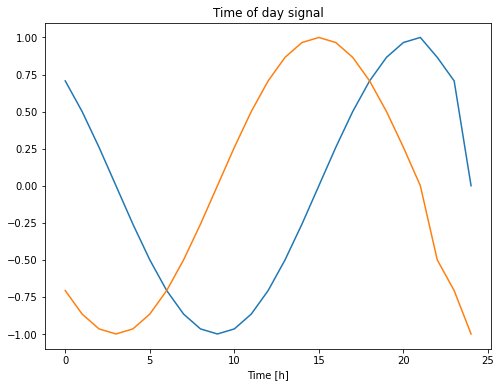

In [18]:
#From TF Tutorial.

plt.plot(np.array(df['Day_sin'])[:25])
plt.plot(np.array(df['Day_cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [19]:
#df.info()

In [20]:
#df.describe().transpose()

<h3>Split the data

In [21]:
#From TF Tutorial.

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:28460]
val_df = df[28460:35575]
test_df = df[35575:]

num_features = df.shape[1]

In [22]:
num_features

9

In [23]:
print(n)
print("The length of Train set is {}".format(len(train_df)))
print("The length of Validate set is {}".format(len(val_df)))
print("The length of Test test set {}".format(len(test_df)))

40575
The length of Train set is 28460
The length of Validate set is 7115
The length of Test test set 5000


<h3> Normalize the Data

In [24]:
train_mean = train_df.mean()
train_std = train_df.std()
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [25]:
#train_df

In [26]:
holiday_dummies

0        0
1        0
2        0
3        0
4        0
        ..
40570    0
40571    0
40572    0
40573    0
40574    0
Name: holiday_dummies, Length: 40575, dtype: int64

In [27]:
#MP 
#Converting weather_main to dummies.
weather_main = pd.get_dummies(weather_main, columns=['weather_main'])

In [28]:
train_weather = weather_main[0:28460]
val_weather = weather_main[28460:35575]
test_weather = weather_main[35575:]

In [29]:
#train_weather

In [30]:
train_df = train_df.join(train_weather)
val_df = val_df.join(val_weather)
test_df = test_df.join(test_weather)

In [31]:
#train_df

In [32]:
#val_df

In [33]:
#test_df

In [34]:
train_holiday_dummies = holiday_dummies[0:28460]
val_holiday_dummies = holiday_dummies[28460:35575]
test_holiday_dummies = holiday_dummies[35575:]
train_df = train_df.join(pd.get_dummies(train_holiday_dummies).add_prefix('Holiday-'))
val_df = val_df.join(pd.get_dummies(val_holiday_dummies).add_prefix('Holiday-'))
test_df = test_df.join(pd.get_dummies(test_holiday_dummies).add_prefix('Holiday-'))


In [35]:
#train_df.describe().transpose()

In [36]:
#train_df

<h3> Window Generator

In [38]:
#From TF Tutorial.
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                     train_df=train_df, val_df=val_df, test_df=test_df,
                     label_columns=None):
          # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

          # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

          # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
              f'Total window size: {self.total_window_size}',
              f'Input indices: {self.input_indices}',
              f'Label indices: {self.label_indices}',
              f'Label column name(s): {self.label_columns}'])

In [41]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
          labels = tf.stack(
              [labels[:, :, self.column_indices[name]] for name in self.label_columns],
              axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [39]:
window_5_1_2 = WindowGenerator(input_width=5, label_width=1, shift=2,
                     label_columns=['traffic_volume'])


In [40]:
window_5_1_2

Total window size: 7
Input indices: [0 1 2 3 4]
Label indices: [6]
Label column name(s): ['traffic_volume']

In [44]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:window_5_1_2.total_window_size]),
                           np.array(train_df[100:100+window_5_1_2.total_window_size]),
                           np.array(train_df[200:200+window_5_1_2.total_window_size])])

example_inputs, example_labels = window_5_1_2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 22)
Inputs shape: (3, 5, 22)
Labels shape: (3, 1, 1)


2022-06-04 23:08:11.982799: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
window_5_1_2.example = example_inputs, example_labels

In [48]:
def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
               label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

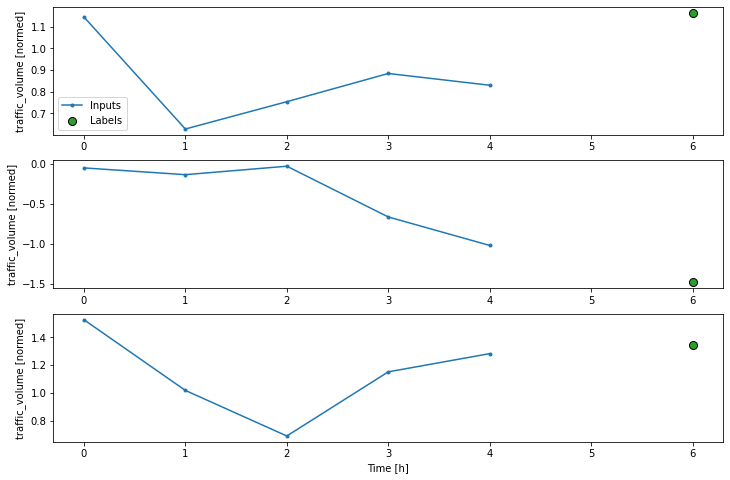

In [49]:
window_5_1_2.plot()